In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.stats import norm
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [52]:
plt.rcParams.update({'figure.figsize': (10, 10), 'font.size': 128})

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

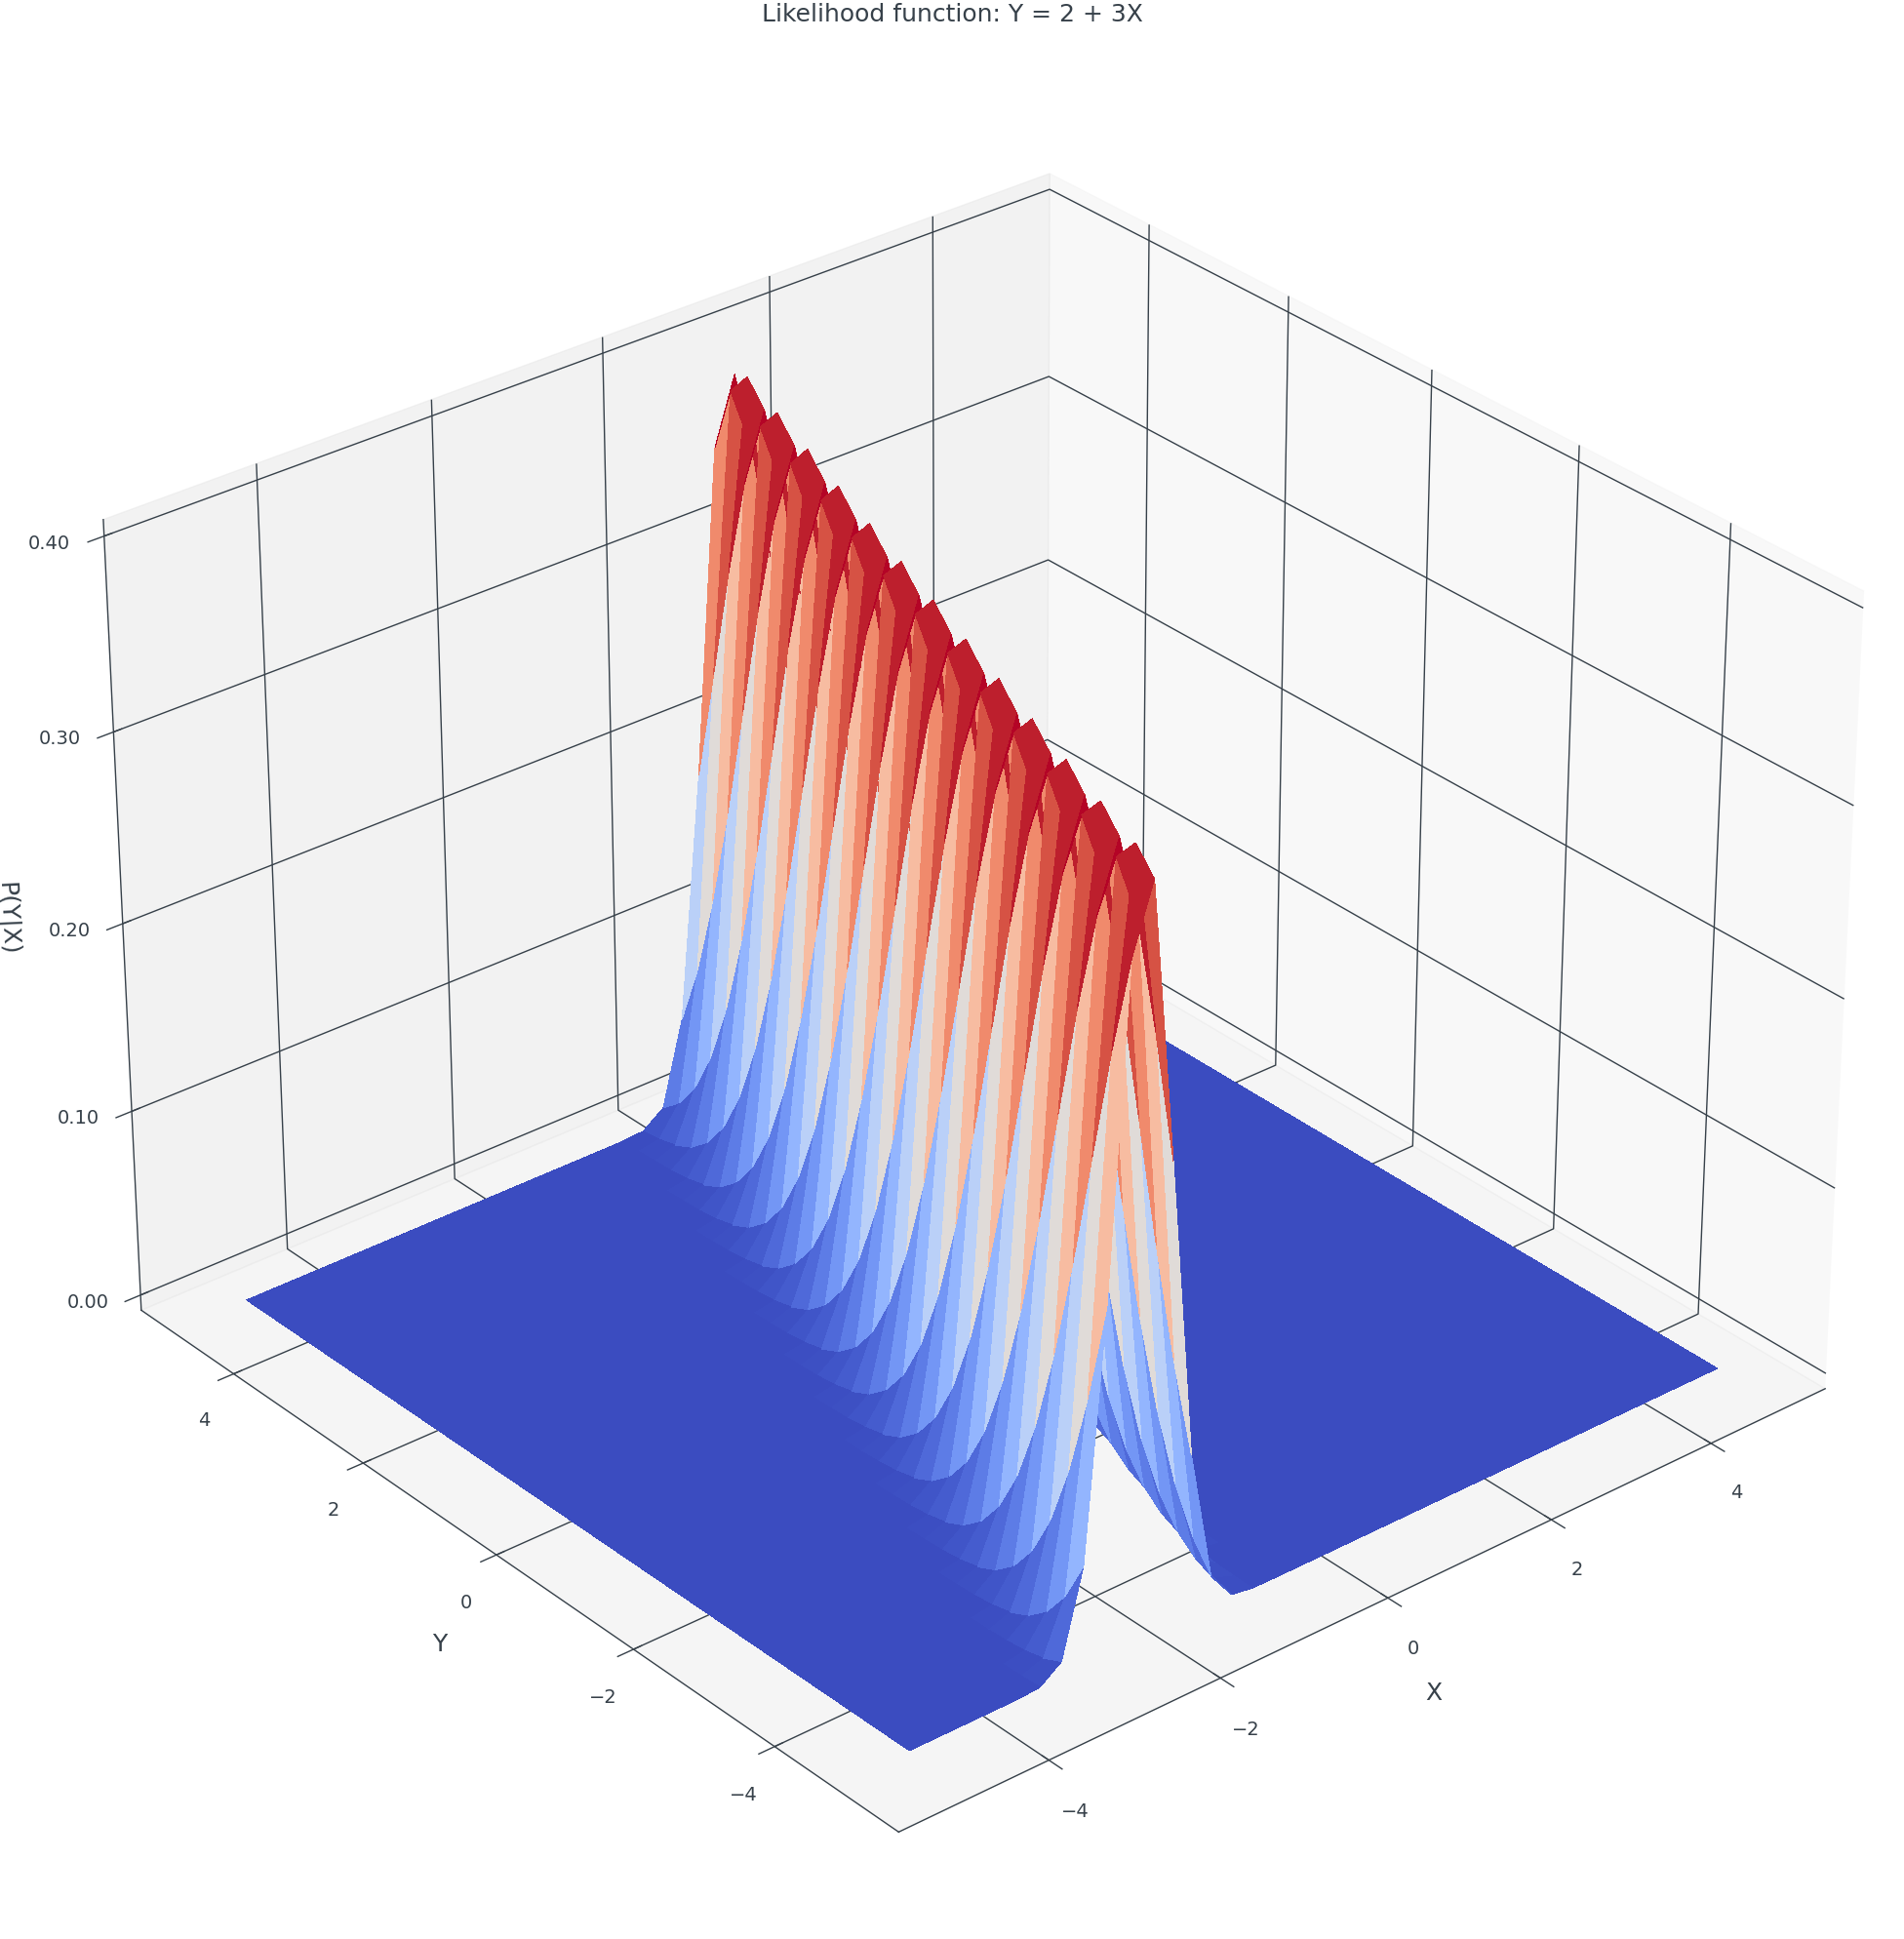

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

beta0 = 2.0
beta1 = 3.0
Z = norm.pdf(Y, beta0 + beta1*X, 1.0)

X_tensor = torch.from_numpy(X)
Y_tensor = torch.from_numpy(Y)
Z_tensor = torch.from_numpy(Z)

surf = ax.plot_surface(
    X_tensor, Y_tensor, Z_tensor, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)

ax.set_zlim(0, 0.4)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('P(Y|X)')

ax.view_init(elev=30., azim=50.0)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_title('Likelihood function: Y = 2 + 3X')
plt.savefig('figures/mle/linear_reg.pdf')